## Simulation data for chillers

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Time series for 24 hours
time = np.linspace(0, 24, 1000)

# Ambient temperature (daily temperature cycle with noise)
ambient_temp = 25 + 5 * np.sin(2 * np.pi * time / 24) + np.random.normal(0, 0.5, len(time))

# Simulate data for 3 chillers
chillers = []
for i in range(3):
    # Simulate cooling load (higher for newer chillers)
    cooling_load = 50 + (20 + i * 10) * np.random.rand(len(time))

    # Power consumption (more efficient chillers use less power)
    power_consumption = cooling_load / (3.5 - 0.2 * i)
    power_consumption += np.random.normal(0, 1.5, len(power_consumption))  # Add noise

    # Calculate CPI (Chiller Performance Index)
    cpi = cooling_load / power_consumption

    # Create DataFrame for each chiller
    chiller_data = pd.DataFrame({
        'Time': time,
        'AmbientTemp': ambient_temp,
        'CoolingLoad': cooling_load,
        'PowerConsumption': power_consumption,
        'CPI': cpi,
        'ChillerID': f'Chiller_{i+1}'
    })

    chillers.append(chiller_data)

# Combine all chiller data into one DataFrame
chiller_data = pd.concat(chillers)

# Define the file path where the CSV will be saved
file_path = r"C:\Elements of AI\simulated_chiller_data.csv"

# Save to CSV in the specified local folder
chiller_data.to_csv(file_path, index=False)

print(f"Simulated chiller data generated and saved at: {file_path}")


Simulated chiller data generated and saved at: C:\Elements of AI\simulated_chiller_data.csv


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              3000 non-null   float64
 1   AmbientTemp       3000 non-null   float64
 2   CoolingLoad       3000 non-null   float64
 3   PowerConsumption  3000 non-null   float64
 4   CPI               3000 non-null   float64
 5   ChillerID         3000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 140.8+ KB
None

First 5 Rows:
       Time  AmbientTemp  CoolingLoad  PowerConsumption       CPI  ChillerID
0  0.000000    25.326849    53.026844         16.078252  3.298048  Chiller_1
1  0.024024    24.690674    68.210008         18.180215  3.751881  Chiller_1
2  0.048048    25.391831    64.904732         18.603892  3.488772  Chiller_1
3  0.072072    24.155651    67.617106         21.458179  3.151111  Chiller_1
4  0.096096    25.474594    63.475988        

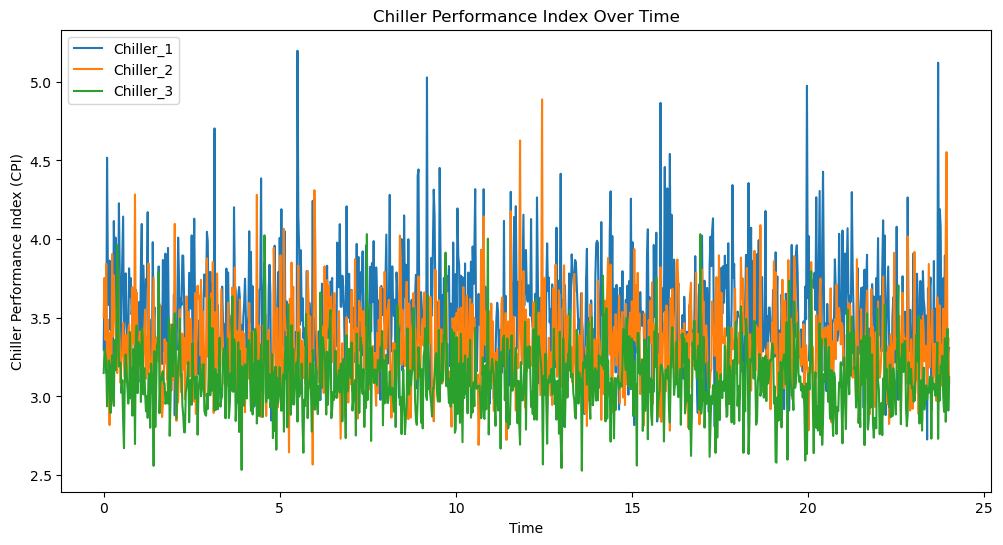

In [6]:

# Define file path
file_path = r"C:\Elements of AI\simulated_chiller_data.csv"

# Load the simulated chiller data
chiller_data = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
print(chiller_data.info())

# Display first few rows
print("\nFirst 5 Rows:")
print(chiller_data.head())

# Check for missing values
print("\nMissing Values:")
print(chiller_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(chiller_data.describe())

# Plot CPI trends for different chillers
plt.figure(figsize=(12, 6))
for chiller in chiller_data['ChillerID'].unique():
    subset = chiller_data[chiller_data['ChillerID'] == chiller]
    plt.plot(subset['Time'], subset['CPI'], label=chiller)

plt.xlabel('Time')
plt.ylabel('Chiller Performance Index (CPI)')
plt.title('Chiller Performance Index Over Time')
plt.legend()
plt.show()


## CPI upper and lower boundaries

C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


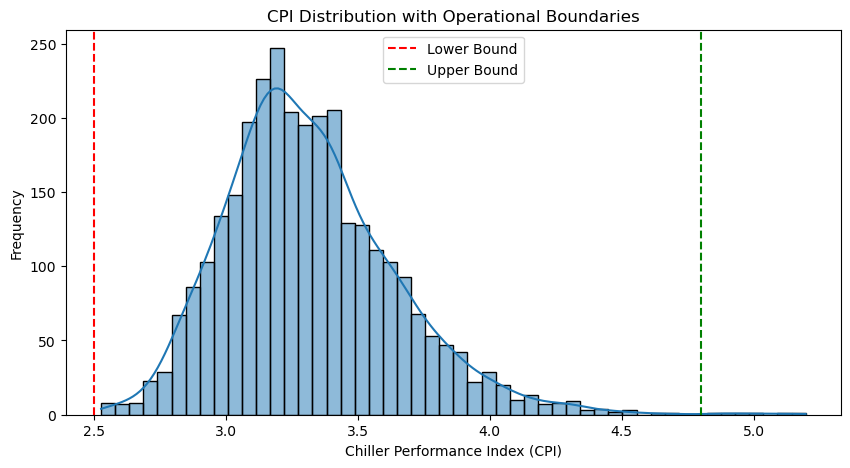

CPI Status Counts:
 CPI_Status
Normal    2994
High         6
Name: count, dtype: int64
Processed chiller data saved to C:\Elements of AI\processed_chiller_data.csv


In [7]:


# Load the simulated chiller data
file_path = "C:\\Elements of AI\\simulated_chiller_data.csv"
chiller_data = pd.read_csv(file_path)

# Define CPI limits (adjust as necessary)
CPI_LOWER_BOUND = 2.5
CPI_UPPER_BOUND = 4.8

# Add new column for CPI status
chiller_data["CPI_Status"] = np.where(
    chiller_data["CPI"] < CPI_LOWER_BOUND, "Low",
    np.where(chiller_data["CPI"] > CPI_UPPER_BOUND, "High", "Normal")
)

# Display CPI distribution
plt.figure(figsize=(10, 5))
sns.histplot(chiller_data["CPI"], bins=50, kde=True)
plt.axvline(CPI_LOWER_BOUND, color="red", linestyle="dashed", label="Lower Bound")
plt.axvline(CPI_UPPER_BOUND, color="green", linestyle="dashed", label="Upper Bound")
plt.title("CPI Distribution with Operational Boundaries")
plt.xlabel("Chiller Performance Index (CPI)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Display class distribution
print("CPI Status Counts:\n", chiller_data["CPI_Status"].value_counts())

# Save the modified dataset
output_path = "C:\\Elements of AI\\processed_chiller_data.csv"
chiller_data.to_csv(output_path, index=False)

print(f"Processed chiller data saved to {output_path}")


## CPI comparison

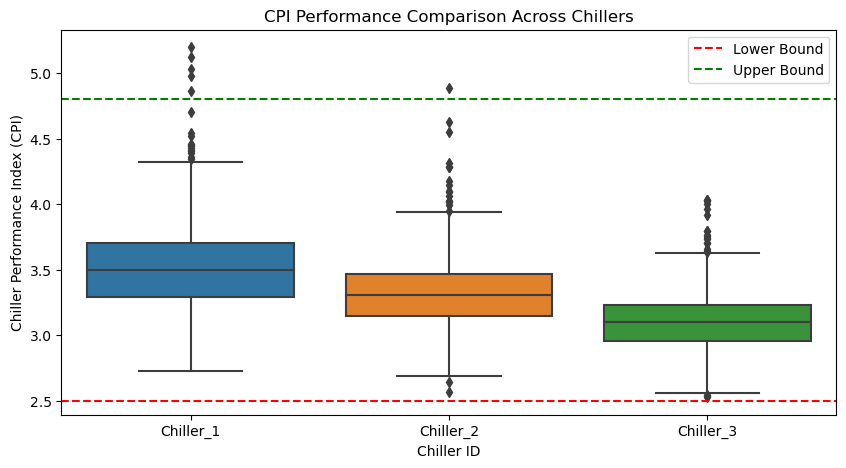

In [8]:


# Boxplot to compare CPI performance among chillers
plt.figure(figsize=(10, 5))
sns.boxplot(x="ChillerID", y="CPI", data=chiller_data)
plt.axhline(CPI_LOWER_BOUND, color="red", linestyle="dashed", label="Lower Bound")
plt.axhline(CPI_UPPER_BOUND, color="green", linestyle="dashed", label="Upper Bound")
plt.title("CPI Performance Comparison Across Chillers")
plt.ylabel("Chiller Performance Index (CPI)")
plt.xlabel("Chiller ID")
plt.legend()
plt.show()


## Chiller Summary Stats

In [9]:
import pandas as pd
from IPython.display import display  # Use display() instead of ace_tools

# Grouped summary statistics per chiller
chiller_summary = chiller_data.groupby("ChillerID")["CPI"].describe()

# Display the DataFrame in Jupyter Notebook
display(chiller_summary)


count      mean       std       min       25%       50%       75%  \
ChillerID                                                                       
Chiller_1  1000.0  3.527742  0.330296  2.726758  3.290329  3.498248  3.706474   
Chiller_2  1000.0  3.325309  0.267122  2.567398  3.148417  3.305474  3.465570   
Chiller_3  1000.0  3.104050  0.222887  2.528280  2.957919  3.099286  3.229282   

                max  
ChillerID            
Chiller_1  5.197300  
Chiller_2  4.887676  
Chiller_3  4.031764

## CPI trend

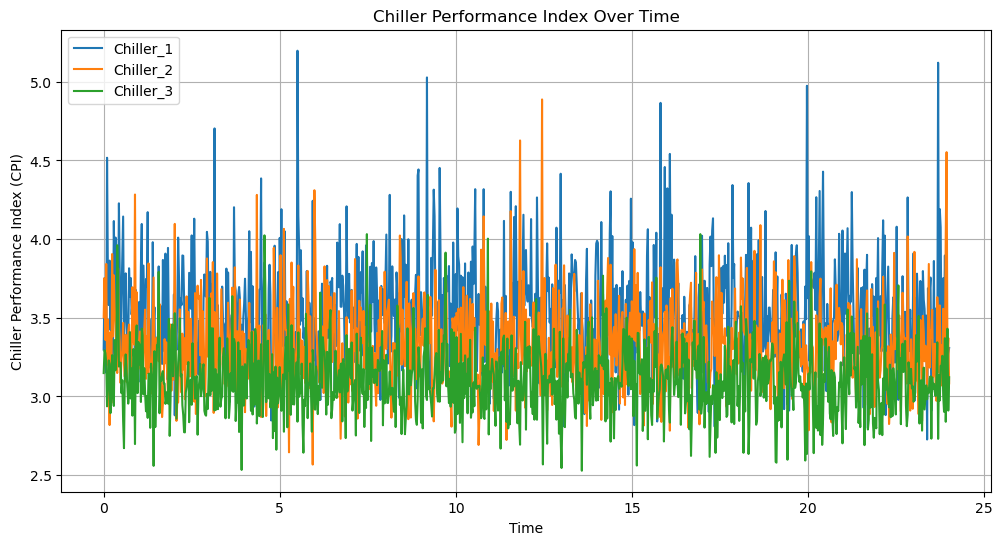

In [10]:
# Define file path
file_path = "C:\\Elements of AI\\simulated_chiller_data.csv"

# Load the data
chiller_data = pd.read_csv(file_path)

# Convert 'Time' column to numeric if needed
chiller_data['Time'] = pd.to_numeric(chiller_data['Time'], errors='coerce')

# Plot CPI trends for each chiller
plt.figure(figsize=(12, 6))

for chiller in chiller_data['ChillerID'].unique():
    subset = chiller_data[chiller_data['ChillerID'] == chiller]
    plt.plot(subset['Time'], subset['CPI'], label=chiller)

plt.xlabel("Time")
plt.ylabel("Chiller Performance Index (CPI)")
plt.title("Chiller Performance Index Over Time")
plt.legend()
plt.grid(True)
plt.show()


## Feature Engineering

In [11]:

# Load the dataset
file_path = "C:\\Elements of AI\\simulated_chiller_data.csv"
data = pd.read_csv(file_path)

# Feature 1: Extract Hour of the Day
data['Hour'] = data['Time'] % 24

# Feature 2: Rolling Mean and Std (window=5)
data['CPI_Rolling_Mean'] = data.groupby("ChillerID")['CPI'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
data['CPI_Rolling_Std'] = data.groupby("ChillerID")['CPI'].rolling(window=5, min_periods=1).std().reset_index(level=0, drop=True)

# Feature 3: Lag Features (CPI Lag of 1 and 2 steps)
data['CPI_Lag_1'] = data.groupby("ChillerID")['CPI'].shift(1)
data['CPI_Lag_2'] = data.groupby("ChillerID")['CPI'].shift(2)

# Feature 4: Interaction Term (Cooling Load * Power Consumption)
data['CoolingLoad_PowerConsumption'] = data['CoolingLoad'] * data['PowerConsumption']

# Feature 5: Encoding ChillerID
data['ChillerID_Encoded'] = data['ChillerID'].astype('category').cat.codes

# Drop missing values from shifting operations
data = data.dropna()

# Save the processed dataset
processed_file_path = "C:\\Elements of AI\\processed_chiller_data.csv"
data.to_csv(processed_file_path, index=False)

print(f"Feature engineering completed. Processed data saved to {processed_file_path}.")


Feature engineering completed. Processed data saved to C:\Elements of AI\processed_chiller_data.csv.


## EDA and Feature Visualisation

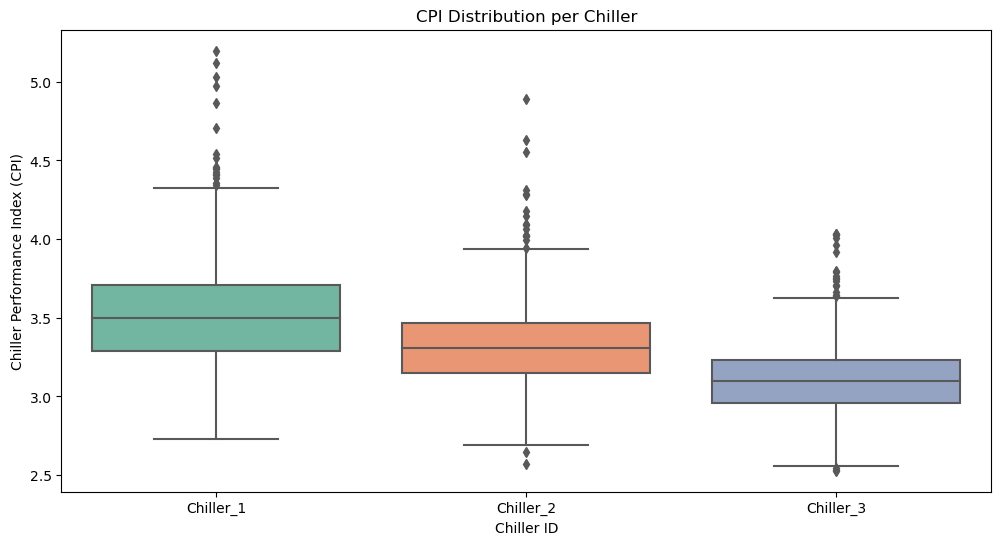

C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

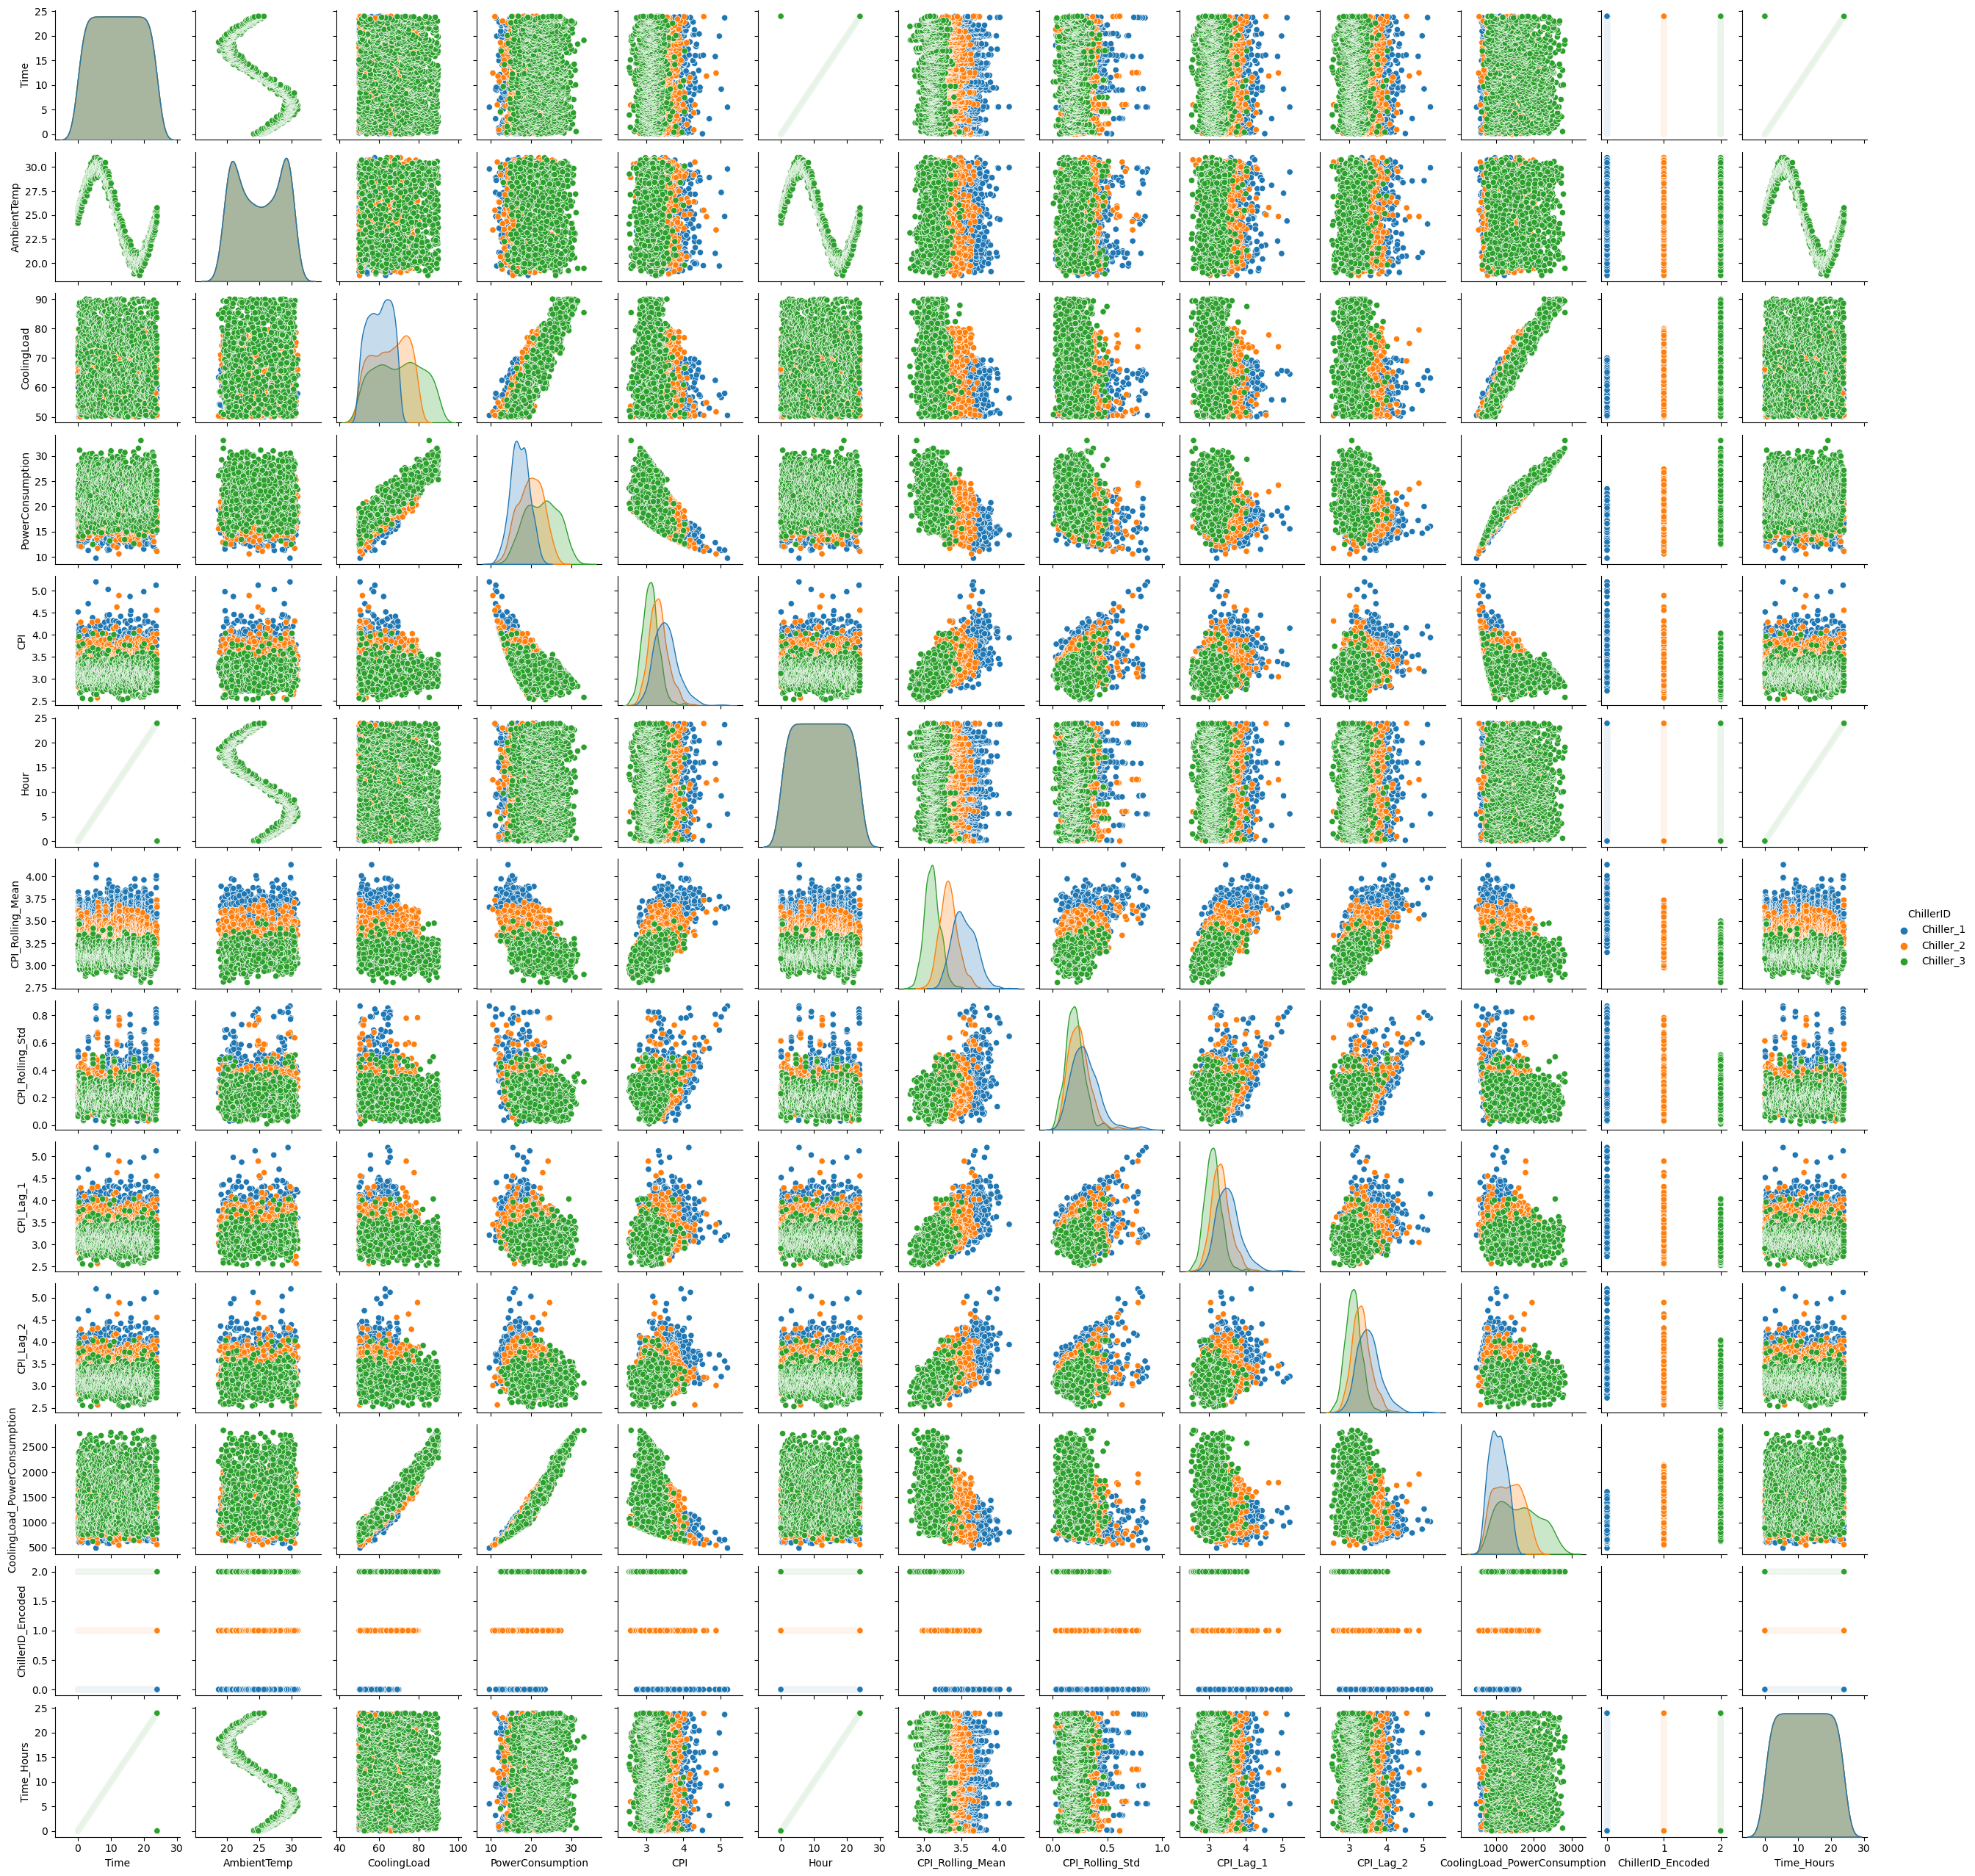

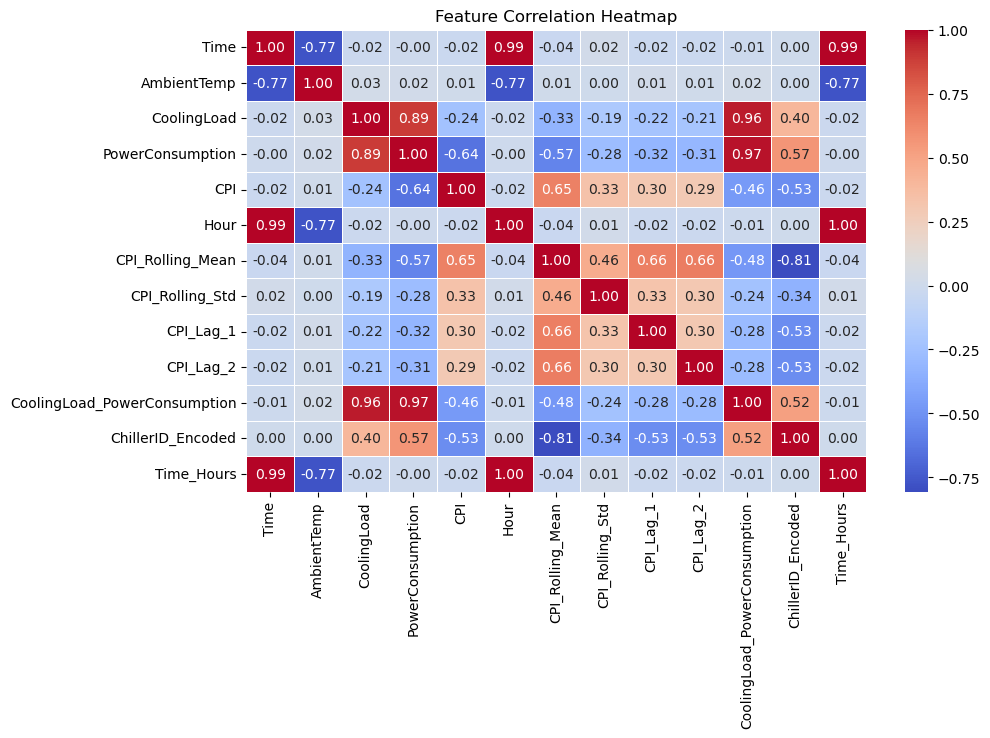

C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\suren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

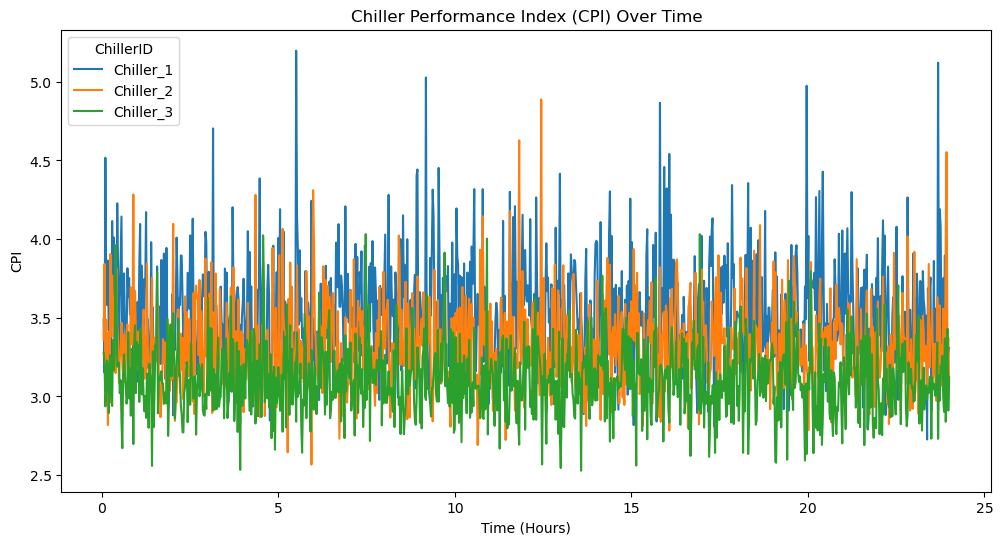

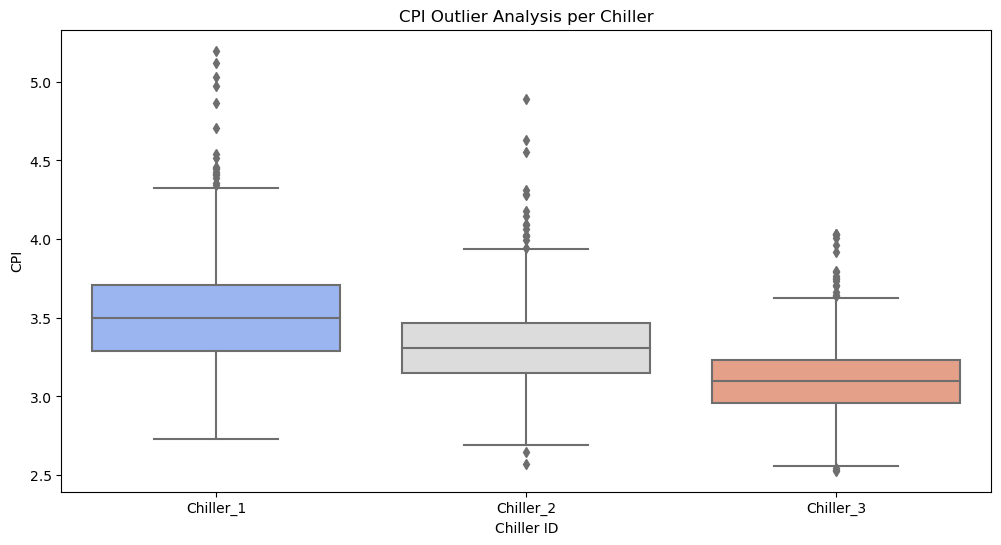

EDA Completed. Proceeding to Model Training...


In [12]:
# Load the processed data
file_path = "C:\\Elements of AI\\processed_chiller_data.csv"
chiller_data = pd.read_csv(file_path)

# Convert Time column to hours (if needed)
chiller_data['Time_Hours'] = chiller_data['Time'] % 24

### 1. CPI Distribution per Chiller
plt.figure(figsize=(12, 6))
sns.boxplot(x="ChillerID", y="CPI", data=chiller_data, palette="Set2")
plt.title("CPI Distribution per Chiller")
plt.xlabel("Chiller ID")
plt.ylabel("Chiller Performance Index (CPI)")
plt.show()

### 2. Pairplot to analyze feature relationships
sns.pairplot(chiller_data, hue="ChillerID", diag_kind="kde", height=2)
plt.show()

### 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = chiller_data.drop(columns=["ChillerID"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### 4. CPI Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x="Time", y="CPI", hue="ChillerID", data=chiller_data)
plt.title("Chiller Performance Index (CPI) Over Time")
plt.xlabel("Time (Hours)")
plt.ylabel("CPI")
plt.show()

### 5. Detecting Outliers in CPI
plt.figure(figsize=(12, 6))
sns.boxplot(x="ChillerID", y="CPI", data=chiller_data, palette="coolwarm")
plt.title("CPI Outlier Analysis per Chiller")
plt.xlabel("Chiller ID")
plt.ylabel("CPI")
plt.show()

print("EDA Completed. Proceeding to Model Training...")


## Address imbalanced data

In [13]:
import pandas as pd

# Load data
file_path = "C:\\Elements of AI\\processed_chiller_data.csv"
data = pd.read_csv(file_path)

# Define CPI thresholds (adjust if necessary)
LOWER_CPI = 2.5
UPPER_CPI = 4.8

# Create CPI Status column
data['CPI_Status'] = data['CPI'].apply(lambda x: 'Low' if x < LOWER_CPI else ('High' if x > UPPER_CPI else 'Normal'))

# Save updated data
data.to_csv(file_path, index=False)

# Check if the column was successfully added
print("Updated Columns in Dataset:", data.columns)
print("Class Distribution:\n", data['CPI_Status'].value_counts())


Updated Columns in Dataset: Index(['Time', 'AmbientTemp', 'CoolingLoad', 'PowerConsumption', 'CPI',
       'ChillerID', 'Hour', 'CPI_Rolling_Mean', 'CPI_Rolling_Std', 'CPI_Lag_1',
       'CPI_Lag_2', 'CoolingLoad_PowerConsumption', 'ChillerID_Encoded',
       'CPI_Status'],
      dtype='object')
Class Distribution:
 CPI_Status
Normal    2988
High         6
Name: count, dtype: int64


In [11]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load data
file_path = "C:\\Elements of AI\\processed_chiller_data.csv"
data = pd.read_csv(file_path)

# Verify CPI_Status column exists
if "CPI_Status" not in data.columns:
    raise KeyError("CPI_Status column is missing from the dataset.")

# Define features and target variable
X = data.drop(columns=["CPI_Status"])  # Features
y = data["CPI_Status"]  # Target variable

# Option 1: **Random Oversampling** (increase minority classes)
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Option 2: **Random Undersampling** (reduce majority class)
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Create new DataFrame with resampled data
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data["CPI_Status"] = y_resampled  # Add target back

# Save the resampled dataset
resampled_file_path = "C:\\Elements of AI\\resampled_chiller_data.csv"
resampled_data.to_csv(resampled_file_path, index=False)

# Print class distribution after resampling
print("Class distribution after resampling:\n", y_resampled.value_counts())
print(f"Resampled dataset saved to {resampled_file_path}")


Class distribution after resampling:
 CPI_Status
Normal    2990
High      2990
Low       2990
Name: count, dtype: int64
Resampled dataset saved to C:\Elements of AI\resampled_chiller_data.csv


## Summary stats and correlation

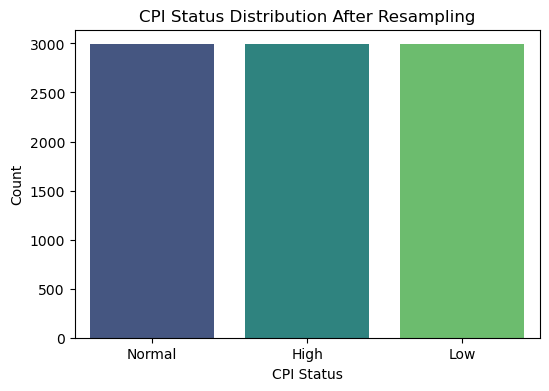

Summary Statistics:
               Time  AmbientTemp  CoolingLoad  PowerConsumption          CPI  \
count  8970.000000  8970.000000  8970.000000       8970.000000  8970.000000   
mean     14.529446    24.921551    59.423441         17.823566     3.728447   
std       7.104682     3.052818     8.509114          6.242073     1.241360   
min       0.048048    18.720976    50.010361          9.931325     2.469485   
25%       6.270270    22.346345    51.145289         10.552753     2.480439   
50%      12.372372    24.642238    59.219217         19.006300     3.295665   
75%      21.669670    28.462966    65.516514         22.222949     5.149896   
max      24.000000    31.463893    89.998337         32.386735     5.611731   

              Hour  CPI_Rolling_Mean  CPI_Rolling_Std    CPI_Lag_1  \
count  8970.000000       8970.000000      8970.000000  8970.000000   
mean     14.521419          3.390463         0.433794     3.332017   
std       7.107535          0.476177         0.290305    

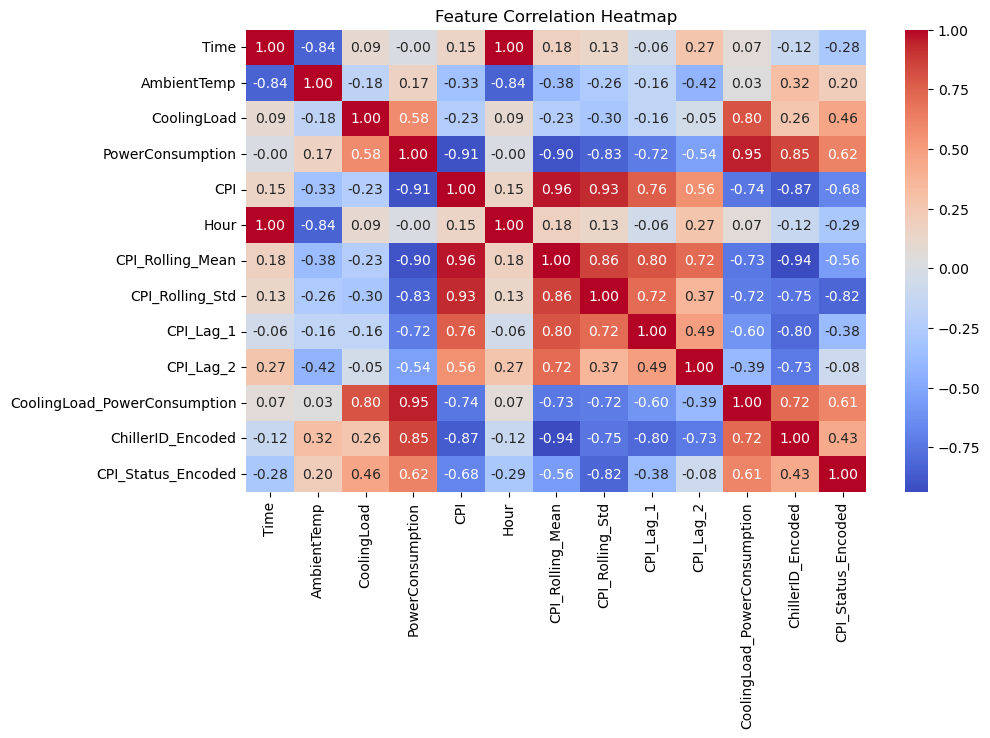

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load resampled data
file_path = "C:\\Elements of AI\\resampled_chiller_data.csv"
data = pd.read_csv(file_path)

# Encode categorical columns before correlation analysis
data["ChillerID_Encoded"] = data["ChillerID"].astype("category").cat.codes
data["CPI_Status_Encoded"] = data["CPI_Status"].astype("category").cat.codes

# Check class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="CPI_Status", data=data, palette="viridis")
plt.title("CPI Status Distribution After Resampling")
plt.xlabel("CPI Status")
plt.ylabel("Count")
plt.show()

# Summary statistics
print("Summary Statistics:\n", data.describe())

# Check correlations (Dropping non-numeric columns)
numeric_data = data.drop(columns=["ChillerID", "CPI_Status"])  # Drop categorical columns

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## Auto correlation and multicolinearity checks

### Colinearity  VIF

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Elements of AI\\resampled_chiller_data.csv"
data = pd.read_csv(file_path)

# Select only numerical features for VIF analysis
numeric_features = data.select_dtypes(include=[np.number]).drop(columns=["CPI_Status_Encoded"], errors='ignore')

# Add constant for VIF calculation
X = sm.add_constant(numeric_features)

# Compute VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF scores
print("\nVariance Inflation Factor (VIF) Scores:\n", vif_data)



Variance Inflation Factor (VIF) Scores:
                          Feature          VIF
0                          const  7413.651287
1                           Time   263.824738
2                    AmbientTemp     5.201099
3                    CoolingLoad    42.624252
4               PowerConsumption   393.661335
5                            CPI   173.316383
6                           Hour   265.117830
7               CPI_Rolling_Mean    98.258000
8                CPI_Rolling_Std    21.326016
9                      CPI_Lag_1     4.675734
10                     CPI_Lag_2     5.941018
11  CoolingLoad_PowerConsumption   270.936538
12             ChillerID_Encoded    11.946180


In [16]:
# Drop high VIF features
selected_features = ["AmbientTemp", "CPI", "CPI_Rolling_Std", "CPI_Lag_1", "CPI_Lag_2", "ChillerID_Encoded"]
data_selected = data[selected_features]

# Compute VIF again after dropping features
X = sm.add_constant(data_selected)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nUpdated VIF Scores after Feature Selection:\n", vif_data)



Updated VIF Scores after Feature Selection:
              Feature          VIF
0              const  1095.396299
1        AmbientTemp     1.298889
2                CPI    14.919114
3    CPI_Rolling_Std     9.723241
4          CPI_Lag_1     3.180404
5          CPI_Lag_2     3.045198
6  ChillerID_Encoded     8.023275


<Figure size 1200x600 with 0 Axes>

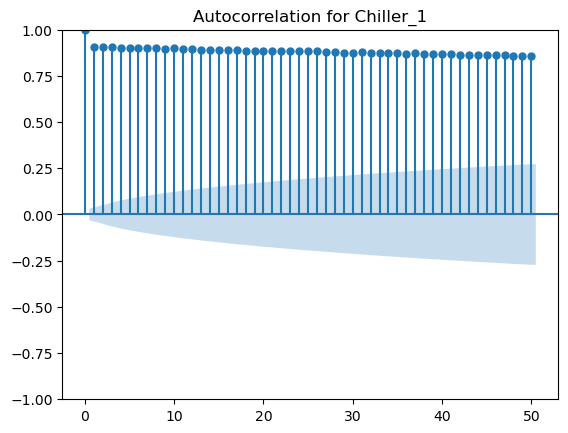

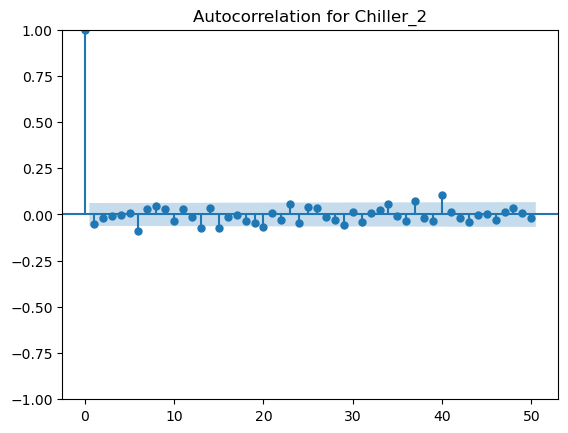

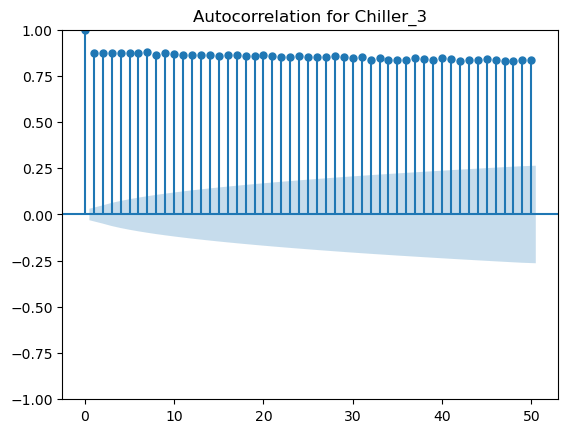

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Define file path (Use your fixed path)
file_path = "C:\\Elements of AI\\resampled_chiller_data.csv"

# Load data
data = pd.read_csv(file_path)

# Convert 'Time' column to numeric type if necessary
data['Time'] = pd.to_numeric(data['Time'], errors='coerce')

# Plot ACF for each Chiller's CPI
plt.figure(figsize=(12, 6))
for chiller in data['ChillerID'].unique():
    chiller_data = data[data['ChillerID'] == chiller]
    plot_acf(chiller_data['CPI'], lags=50, alpha=0.05, title=f"Autocorrelation for {chiller}")

plt.show()


## Differencing to address high autocorrelation

Differenced dataset saved to: C:\Elements of AI\processed_chiller_data_diff_transformed.csv


<Figure size 1200x600 with 0 Axes>

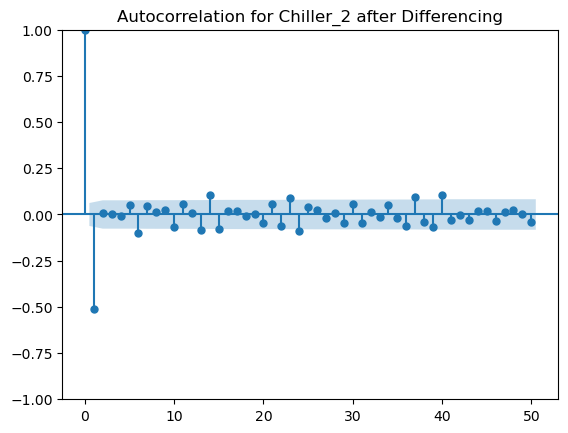

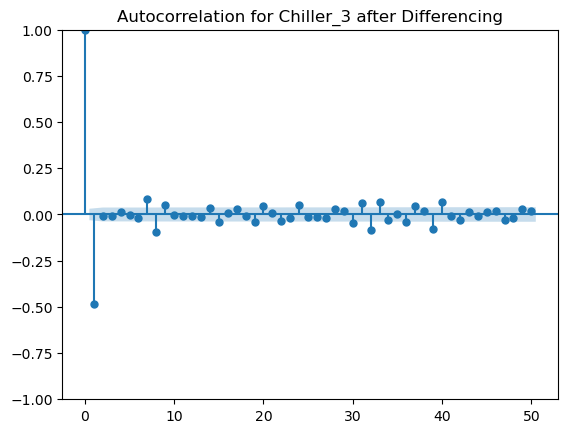

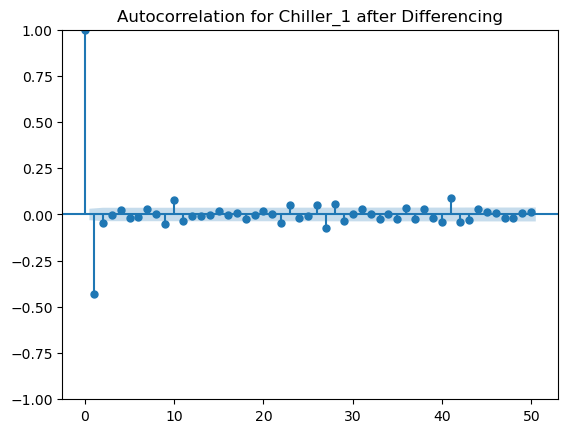

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Define file path
file_path = "C:\\Elements of AI\\resampled_chiller_data.csv"
output_file_path = "C:\\Elements of AI\\processed_chiller_data_diff_transformed.csv"

# Load data
data = pd.read_csv(file_path)

# Ensure 'Time' column is sorted
data = data.sort_values(by=['Time'])

# Apply differencing to each chiller's CPI
for chiller in data['ChillerID'].unique():
    chiller_mask = data['ChillerID'] == chiller
    data.loc[chiller_mask, 'CPI_Diff'] = data.loc[chiller_mask, 'CPI'].diff()

# Drop NaN values created due to differencing
data = data.dropna()

# Save the transformed dataset
data.to_csv(output_file_path, index=False)

print(f"Differenced dataset saved to: {output_file_path}")

# Plot ACF for each chiller after differencing
plt.figure(figsize=(12, 6))
for chiller in data['ChillerID'].unique():
    chiller_data = data[data['ChillerID'] == chiller]
    plot_acf(chiller_data['CPI_Diff'], lags=50, alpha=0.05, title=f"Autocorrelation for {chiller} after Differencing")

plt.show()


## Using transformed dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define file path
file_path = "C:\\Elements of AI\\processed_chiller_data_diff_transformed.csv"

# Load the transformed dataset
data = pd.read_csv(file_path)

# Display dataset info
print("Dataset Overview:")
print(data.info())

# Display first few rows
print("\nSample Data:")
print(data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8967 entries, 0 to 8966
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Time                          8967 non-null   float64
 1   AmbientTemp                   8967 non-null   float64
 2   CoolingLoad                   8967 non-null   float64
 3   PowerConsumption              8967 non-null   float64
 4   CPI                           8967 non-null   float64
 5   ChillerID                     8967 non-null   object 
 6   Hour                          8967 non-null   float64
 7   CPI_Rolling_Mean              8967 non-null   float64
 8   CPI_Rolling_Std               8967 non-null   float64
 9   CPI_Lag_1                     8967 non-null   float64
 10  CPI_Lag_2                     8967 non-null   float64
 11  CoolingLoad_PowerConsumption  8967 non-null   float64
 12  ChillerID_Encoded             8967 non-null 

In [20]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values if any (modify accordingly)
data.fillna(method='ffill', inplace=True)

# Encode categorical columns if needed
if 'CPI_Status' in data.columns:
    label_encoder = LabelEncoder()
    data['CPI_Status_Encoded'] = label_encoder.fit_transform(data['CPI_Status'])

# Drop original categorical column after encoding
data.drop(columns=['CPI_Status'], inplace=True, errors='ignore')

# Save the cleaned dataset
cleaned_file_path = "C:\\Elements of AI\\processed_chiller_data_cleaned.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")



Missing Values:
Time                            0
AmbientTemp                     0
CoolingLoad                     0
PowerConsumption                0
CPI                             0
ChillerID                       0
Hour                            0
CPI_Rolling_Mean                0
CPI_Rolling_Std                 0
CPI_Lag_1                       0
CPI_Lag_2                       0
CoolingLoad_PowerConsumption    0
ChillerID_Encoded               0
CPI_Status                      0
CPI_Diff                        0
dtype: int64


C:\Users\suren\AppData\Local\Temp\ipykernel_8752\4140140903.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)



Cleaned dataset saved to: C:\Elements of AI\processed_chiller_data_cleaned.csv


In [21]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns Found:", categorical_columns)

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoder for future use

# Define features and target
X = data.drop(columns=['CPI_Status_Encoded'])
y = data['CPI_Status_Encoded']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete. Data is ready for model training.")


Categorical Columns Found: Index(['ChillerID'], dtype='object')
Preprocessing complete. Data is ready for model training.


In [22]:
# Define features and target
X = data.drop(columns=['CPI_Status_Encoded'])
y = data['CPI_Status_Encoded']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Class distribution in training set:
 CPI_Status_Encoded
1    2423
0    2381
2    2369
Name: count, dtype: int64
Class distribution in test set:
 CPI_Status_Encoded
2    618
0    609
1    567
Name: count, dtype: int64


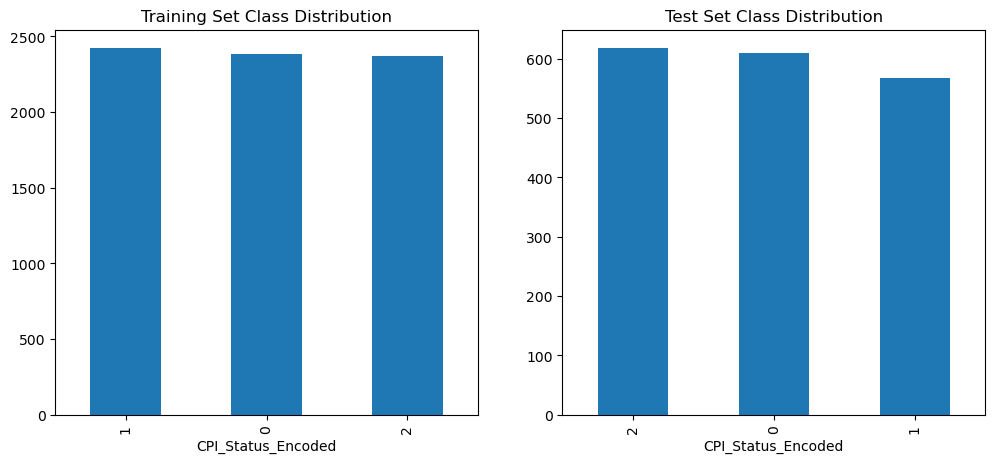

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Check class distribution
train_class_distribution = pd.Series(y_train).value_counts()
test_class_distribution = pd.Series(y_test).value_counts()

# Print class distribution
print("Class distribution in training set:\n", train_class_distribution)
print("Class distribution in test set:\n", test_class_distribution)

# Plot class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_class_distribution.plot(kind='bar', ax=axes[0], title="Training Set Class Distribution")
test_class_distribution.plot(kind='bar', ax=axes[1], title="Test Set Class Distribution")

plt.show()


## Ensure XGBoost and Scikit-learn is already installed


In [26]:
print(data.columns)

Index(['Time', 'AmbientTemp', 'CoolingLoad', 'PowerConsumption', 'CPI',
       'ChillerID', 'Hour', 'CPI_Rolling_Mean', 'CPI_Rolling_Std', 'CPI_Lag_1',
       'CPI_Lag_2', 'CoolingLoad_PowerConsumption', 'ChillerID_Encoded',
       'CPI_Diff', 'CPI_Status_Encoded'],
      dtype='object')


In [27]:
print([col for col in data.columns if 'CPI' in col])

['CPI', 'CPI_Rolling_Mean', 'CPI_Rolling_Std', 'CPI_Lag_1', 'CPI_Lag_2', 'CPI_Diff', 'CPI_Status_Encoded']


In [28]:
file_path = "C:\\Elements of AI\\processed_chiller_data_cleaned.csv"  # or the correct file
data = pd.read_csv(file_path)
print(data.columns)


Index(['Time', 'AmbientTemp', 'CoolingLoad', 'PowerConsumption', 'CPI',
       'ChillerID', 'Hour', 'CPI_Rolling_Mean', 'CPI_Rolling_Std', 'CPI_Lag_1',
       'CPI_Lag_2', 'CoolingLoad_PowerConsumption', 'ChillerID_Encoded',
       'CPI_Diff', 'CPI_Status_Encoded'],
      dtype='object')


In [29]:
LOWER_CPI = 2.5
UPPER_CPI = 4.8
data['CPI_Status'] = data['CPI'].apply(lambda x: 'Low' if x < LOWER_CPI else ('High' if x > UPPER_CPI else 'Normal'))


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['CPI_Status_Encoded'] = le.fit_transform(data['CPI_Status'])

print(data['CPI_Status'].unique())
print(data['CPI_Status_Encoded'].unique())


['Normal' 'Low' 'High']
[2 1 0]


In [31]:
file_path = "C:\\Elements of AI\\processed_chiller_data_cleaned.csv"
data.to_csv(file_path, index=False)


## Split data

In [32]:
print(data.columns)


Index(['Time', 'AmbientTemp', 'CoolingLoad', 'PowerConsumption', 'CPI',
       'ChillerID', 'Hour', 'CPI_Rolling_Mean', 'CPI_Rolling_Std', 'CPI_Lag_1',
       'CPI_Lag_2', 'CoolingLoad_PowerConsumption', 'ChillerID_Encoded',
       'CPI_Diff', 'CPI_Status_Encoded', 'CPI_Status'],
      dtype='object')


In [33]:
from sklearn.model_selection import train_test_split

# Define Features (Drop target variable and non-informative columns)
X = data.drop(columns=['CPI_Status', 'ChillerID', 'Time'], errors='ignore')
y = data['CPI_Status']

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Standadise feature data

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = StandardScaler()

# Fit and transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model training

In [35]:
from sklearn.preprocessing import LabelEncoder

# Encode CPI_Status
le = LabelEncoder()
data['CPI_Status'] = le.fit_transform(data['CPI_Status'])

# Verify encoding
print(data['CPI_Status'].unique())  # Should output [0, 1, 2]


[2 1 0]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, data['CPI_Status'], test_size=0.2, random_state=42)


In [37]:
print(data.dtypes)  # Check data types
print(data.select_dtypes(include=['object']).columns)  # Identify categorical columns


Time                            float64
AmbientTemp                     float64
CoolingLoad                     float64
PowerConsumption                float64
CPI                             float64
ChillerID                        object
Hour                            float64
CPI_Rolling_Mean                float64
CPI_Rolling_Std                 float64
CPI_Lag_1                       float64
CPI_Lag_2                       float64
CoolingLoad_PowerConsumption    float64
ChillerID_Encoded                 int64
CPI_Diff                        float64
CPI_Status_Encoded                int32
CPI_Status                        int32
dtype: object
Index(['ChillerID'], dtype='object')


In [38]:
data = data.drop(columns=['ChillerID'])  # Remove categorical column


In [39]:
print(data.dtypes)


Time                            float64
AmbientTemp                     float64
CoolingLoad                     float64
PowerConsumption                float64
CPI                             float64
Hour                            float64
CPI_Rolling_Mean                float64
CPI_Rolling_Std                 float64
CPI_Lag_1                       float64
CPI_Lag_2                       float64
CoolingLoad_PowerConsumption    float64
ChillerID_Encoded                 int64
CPI_Diff                        float64
CPI_Status_Encoded                int32
CPI_Status                        int32
dtype: object


In [40]:
print(X_train.columns)
print(X_test.columns)


Index(['AmbientTemp', 'CoolingLoad', 'PowerConsumption', 'CPI', 'Hour',
       'CPI_Rolling_Mean', 'CPI_Rolling_Std', 'CPI_Lag_1', 'CPI_Lag_2',
       'CoolingLoad_PowerConsumption', 'ChillerID_Encoded', 'CPI_Diff',
       'CPI_Status_Encoded'],
      dtype='object')
Index(['AmbientTemp', 'CoolingLoad', 'PowerConsumption', 'CPI', 'Hour',
       'CPI_Rolling_Mean', 'CPI_Rolling_Std', 'CPI_Lag_1', 'CPI_Lag_2',
       'CoolingLoad_PowerConsumption', 'ChillerID_Encoded', 'CPI_Diff',
       'CPI_Status_Encoded'],
      dtype='object')


In [41]:
X_train["CPI_Status_Encoded"] = pd.to_numeric(X_train["CPI_Status_Encoded"], errors="coerce")
X_test["CPI_Status_Encoded"] = pd.to_numeric(X_test["CPI_Status_Encoded"], errors="coerce")


In [42]:
print("NaN values in X_train:")
print(X_train.isna().sum())

print("\nNaN values in X_test:")
print(X_test.isna().sum())


NaN values in X_train:
AmbientTemp                     0
CoolingLoad                     0
PowerConsumption                0
CPI                             0
Hour                            0
CPI_Rolling_Mean                0
CPI_Rolling_Std                 0
CPI_Lag_1                       0
CPI_Lag_2                       0
CoolingLoad_PowerConsumption    0
ChillerID_Encoded               0
CPI_Diff                        0
CPI_Status_Encoded              0
dtype: int64

NaN values in X_test:
AmbientTemp                     0
CoolingLoad                     0
PowerConsumption                0
CPI                             0
Hour                            0
CPI_Rolling_Mean                0
CPI_Rolling_Std                 0
CPI_Lag_1                       0
CPI_Lag_2                       0
CoolingLoad_PowerConsumption    0
ChillerID_Encoded               0
CPI_Diff                        0
CPI_Status_Encoded              0
dtype: int64


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [44]:
# Define Features and Target
X = data.drop(columns=['CPI_Status'])  # Drop target variable from features
y = data['CPI_Status']  # Target variable

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
print("Categorical columns in X_train:", X_train.select_dtypes(include=['object']).columns)
print("Categorical columns in X_test:", X_test.select_dtypes(include=['object']).columns)


Categorical columns in X_train: Index([], dtype='object')
Categorical columns in X_test: Index([], dtype='object')


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
print(X_train.dtypes)
print(X_test.dtypes)


Time                            float64
AmbientTemp                     float64
CoolingLoad                     float64
PowerConsumption                float64
CPI                             float64
Hour                            float64
CPI_Rolling_Mean                float64
CPI_Rolling_Std                 float64
CPI_Lag_1                       float64
CPI_Lag_2                       float64
CoolingLoad_PowerConsumption    float64
ChillerID_Encoded                 int64
CPI_Diff                        float64
CPI_Status_Encoded                int32
dtype: object
Time                            float64
AmbientTemp                     float64
CoolingLoad                     float64
PowerConsumption                float64
CPI                             float64
Hour                            float64
CPI_Rolling_Mean                float64
CPI_Rolling_Std                 float64
CPI_Lag_1                       float64
CPI_Lag_2                       float64
CoolingLoad_PowerConsumpti

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n♦ Training {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Save trained models for later use
    models[name] = model



♦ Training Logistic Regression...

♦ Training Random Forest...

♦ Training K-Nearest Neighbors...

♦ Training Neural Network (MLP)...


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [  0   0 618]]

Random Forest Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [  0 

In [50]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


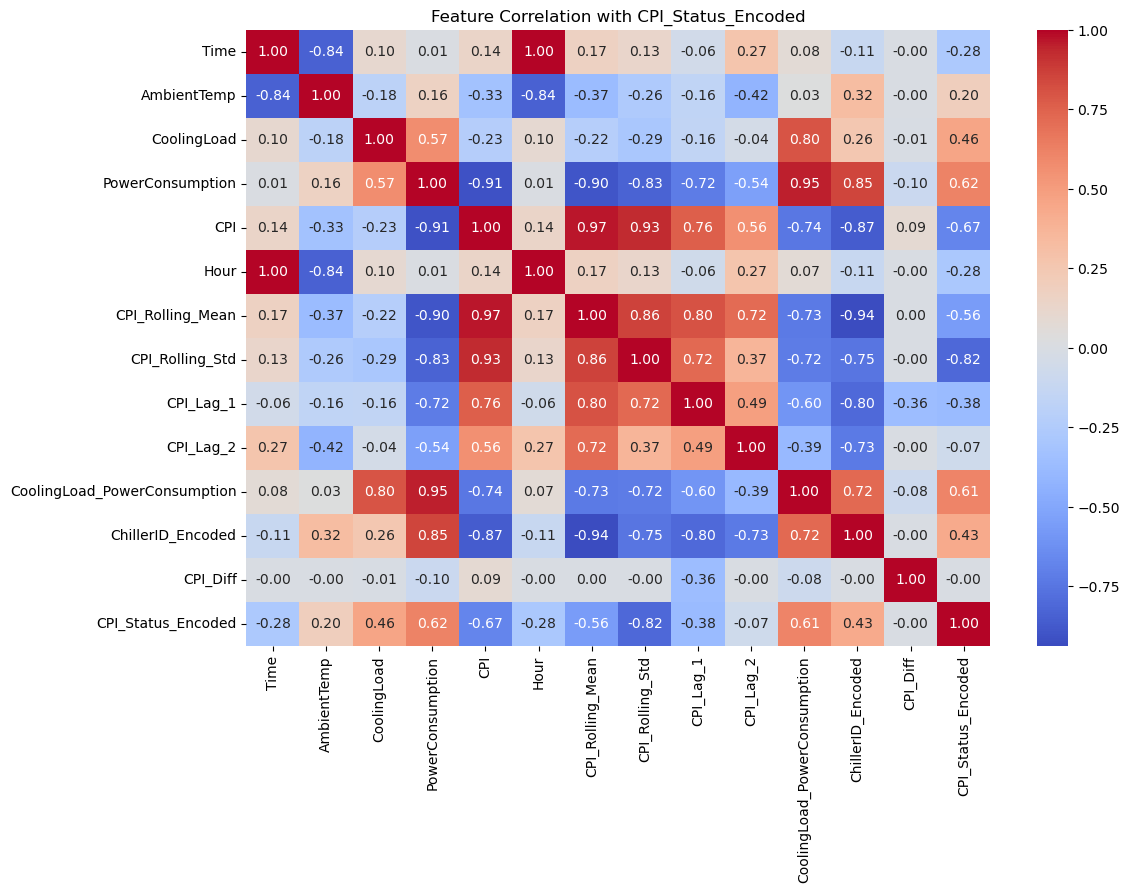

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine train and test data for correlation check
combined_data = X_train.copy()
combined_data['CPI_Status_Encoded'] = y_train  # Append target variable

# Compute correlation
correlation_matrix = combined_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with CPI_Status_Encoded")
plt.show()


In [52]:
drop_cols = ["CPI", "CPI_Rolling_Mean", "CoolingLoad_PowerConsumption"]
X_train.drop(columns=drop_cols, inplace=True)
X_test.drop(columns=drop_cols, inplace=True)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Training Logistic Regression...

Logistic Regression Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [  0   0 618]]

 Training Random Forest...

Random Forest Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00     

In [55]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)


Columns in X_train: Index(['Time', 'AmbientTemp', 'CoolingLoad', 'PowerConsumption', 'Hour',
       'CPI_Rolling_Std', 'CPI_Lag_1', 'CPI_Lag_2', 'ChillerID_Encoded',
       'CPI_Diff', 'CPI_Status_Encoded'],
      dtype='object')
Columns in X_test: Index(['Time', 'AmbientTemp', 'CoolingLoad', 'PowerConsumption', 'Hour',
       'CPI_Rolling_Std', 'CPI_Lag_1', 'CPI_Lag_2', 'ChillerID_Encoded',
       'CPI_Diff', 'CPI_Status_Encoded'],
      dtype='object')


In [56]:
drop_cols = ["CPI", "CPI_Rolling_Mean", "CoolingLoad_PowerConsumption"]

# Check if columns exist before dropping
existing_cols = X_train.columns
drop_cols = [col for col in drop_cols if col in existing_cols]

if drop_cols:  # Only drop if there are columns to remove
    X_train.drop(columns=drop_cols, inplace=True)
    X_test.drop(columns=drop_cols, inplace=True)


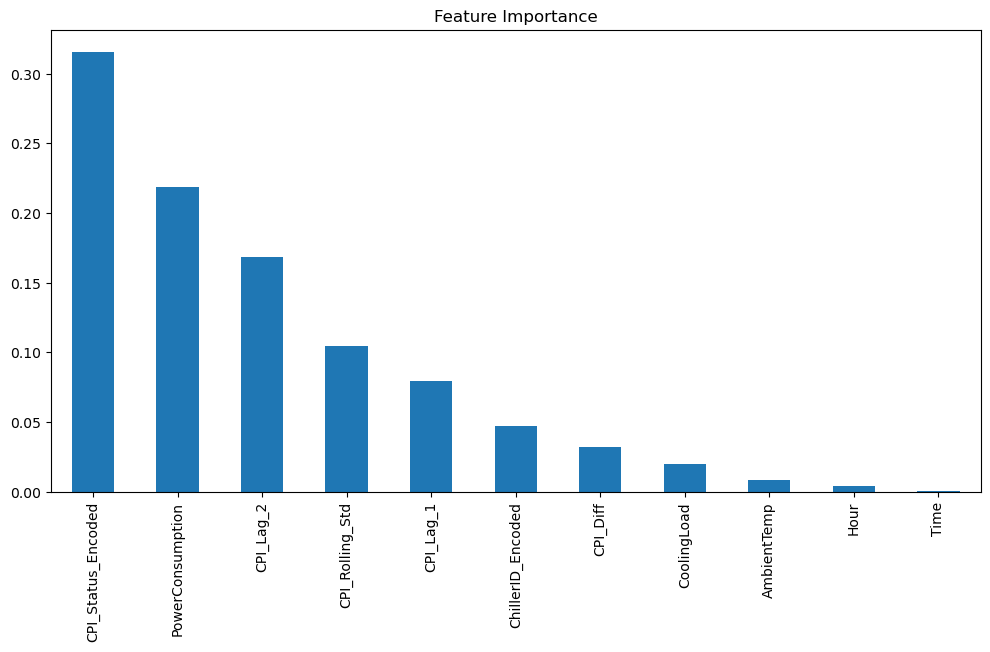

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Train a quick Random Forest model to check feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title="Feature Importance")
plt.show()


In [58]:
# Drop low-importance features
low_importance_features = ['Time', 'Hour', 'AmbientTemp', 'CoolingLoad']
X_train_selected = X_train.drop(columns=low_importance_features)
X_test_selected = X_test.drop(columns=low_importance_features)

# Standardize the data again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print("Feature selection complete. Training models again with reduced features.")


Feature selection complete. Training models again with reduced features.


In [59]:
# Define models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train_scaled, y_train)

    # Save trained models
    models[name] = model



 Training Logistic Regression...

 Training Random Forest...

 Training K-Nearest Neighbors...

 Training Neural Network (MLP)...


In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [  0   0 618]]

Random Forest Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [  0 

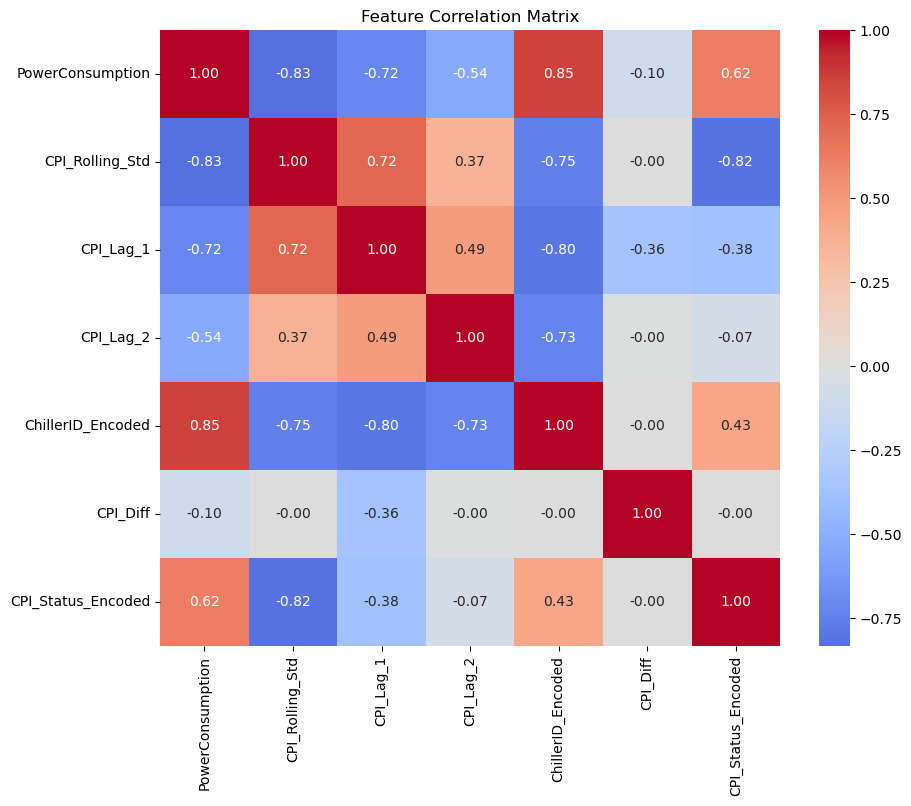

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_train_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()


In [62]:
# Drop highly correlated features
high_corr_features = ['PowerConsumption', 'ChillerID_Encoded', 'CPI_Rolling_Std']
X_train_selected = X_train_selected.drop(columns=high_corr_features, errors='ignore')
X_test_selected = X_test_selected.drop(columns=high_corr_features, errors='ignore')

# Standardize again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print("High-correlation features removed. Models will be retrained.")


High-correlation features removed. Models will be retrained.


In [63]:
# Define models again
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train models again with reduced features
for name, model in models.items():
    print(f"\nTraining {name} with selected features...")
    model.fit(X_train_scaled, y_train)

    # Save trained models
    models[name] = model



Training Logistic Regression with selected features...

Training Random Forest with selected features...

Training K-Nearest Neighbors with selected features...

Training Neural Network (MLP) with selected features...


In [64]:
# Evaluate models after feature selection
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [  0   0 618]]

Random Forest Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [  0 

In [65]:
print(X_train_selected.corrwith(y_train))


CPI_Lag_1            -0.379810
CPI_Lag_2            -0.073570
CPI_Diff             -0.001235
CPI_Status_Encoded    1.000000
dtype: float64


In [66]:
# Drop the feature that leaks the target labels
X_train_selected = X_train_selected.drop(columns=['CPI_Status_Encoded'], errors='ignore')
X_test_selected = X_test_selected.drop(columns=['CPI_Status_Encoded'], errors='ignore')

# Standardize again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print("Leaking feature removed. Models will be retrained.")


Leaking feature removed. Models will be retrained.


In [67]:
# Define models again
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train models again with reduced features
for name, model in models.items():
    print(f"\nTraining {name} with selected features...")
    model.fit(X_train_scaled, y_train)

    # Save trained models
    models[name] = model



Training Logistic Regression with selected features...

Training Random Forest with selected features...

Training K-Nearest Neighbors with selected features...

Training Neural Network (MLP) with selected features...


In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate models after removing correlated features
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Accuracy: 0.8763
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       609
           1       0.90      1.00      0.95       567
           2       1.00      0.64      0.78       618

    accuracy                           0.88      1794
   macro avg       0.90      0.88      0.87      1794
weighted avg       0.90      0.88      0.87      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [161  61 396]]

Random Forest Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [  0 

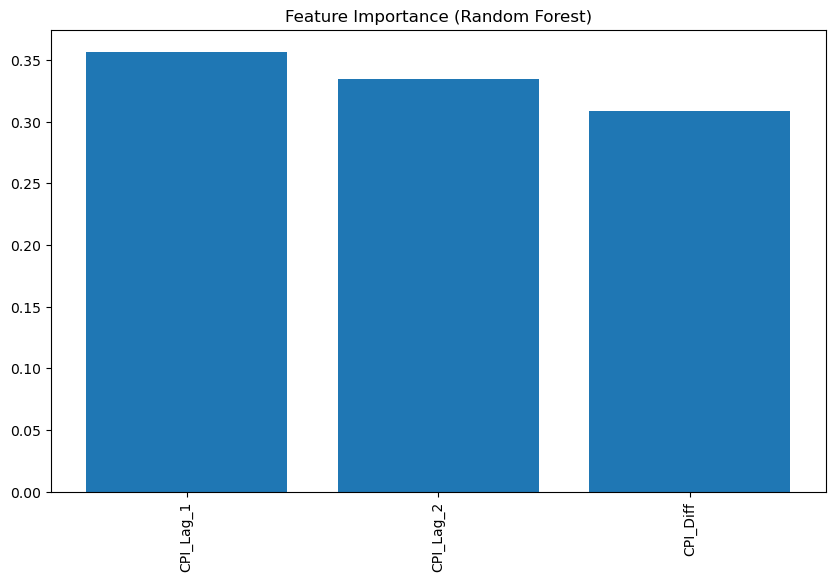

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from Random Forest
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X_train_selected.columns

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.show()


In [70]:
# Train models again with selected features
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train models again
for name, model in models.items():
    print(f"\nTraining {name} with refined features...")
    model.fit(X_train_scaled, y_train)
    models[name] = model  # Save trained model

# Evaluate models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Training Logistic Regression with refined features...

Training Random Forest with refined features...

Training K-Nearest Neighbors with refined features...

Training Neural Network (MLP) with refined features...

Logistic Regression Accuracy: 0.8763
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       609
           1       0.90      1.00      0.95       567
           2       1.00      0.64      0.78       618

    accuracy                           0.88      1794
   macro avg       0.90      0.88      0.87      1794
weighted avg       0.90      0.88      0.87      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [161  61 396]]

Random Forest Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

   

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred = best_model.predict(X_test_scaled)
print(f"\nOptimized Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Optimized Random Forest Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       567
           2       1.00      1.00      1.00       618

    accuracy                           1.00      1794
   macro avg       1.00      1.00      1.00      1794
weighted avg       1.00      1.00      1.00      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [  0   0 618]]


In [72]:
best_model = RandomForestClassifier(
    n_estimators=50, 
    max_depth=10,  # Limit tree depth
    min_samples_split=10,  # Require more samples to split
    min_samples_leaf=5,  # Require more samples per leaf
    random_state=42
)


In [73]:
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)


In [74]:
import pandas as pd

feature_importance = pd.Series(best_model.feature_importances_, index=X_train_selected.columns)
print(feature_importance.sort_values(ascending=False))


CPI_Lag_1    0.354409
CPI_Lag_2    0.332662
CPI_Diff     0.312929
dtype: float64


In [75]:
best_model = RandomForestClassifier(
    n_estimators=50, 
    max_depth=10,  # Limit tree depth
    min_samples_split=10,  # Require more samples to split
    min_samples_leaf=5,  # Require more samples per leaf
    random_state=42
)


In [76]:
X_train_selected = X_train_selected.drop(columns=["CPI_Diff"], errors='ignore')
X_test_selected = X_test_selected.drop(columns=["CPI_Diff"], errors='ignore')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [77]:
best_model = RandomForestClassifier(
    n_estimators=50, 
    max_depth=5,  # Limit tree depth even more
    min_samples_split=15,  # Require more samples to split
    min_samples_leaf=10,  # Require more samples per leaf
    class_weight="balanced",  # Handle potential class imbalance
    random_state=42
)


In [78]:
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)


In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Optimized Random Forest Accuracy: 0.9716
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       609
           1       1.00      1.00      1.00       567
           2       1.00      0.92      0.96       618

    accuracy                           0.97      1794
   macro avg       0.97      0.97      0.97      1794
weighted avg       0.97      0.97      0.97      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [ 51   0 567]]


In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [81]:
best_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,  # Lower max depth
    min_samples_split=20,  # More restrictive split
    min_samples_leaf=15,  # Require more samples per leaf
    class_weight="balanced",  # Adjust for potential imbalance
    random_state=42
)


In [82]:
# Train the model with the resampled data
best_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=15, min_samples_split=20,
                       random_state=42)

In [83]:
# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Print new accuracy and performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"\nOptimized Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Optimized Random Forest Accuracy: 0.9548
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       609
           1       0.99      1.00      0.99       567
           2       1.00      0.87      0.93       618

    accuracy                           0.95      1794
   macro avg       0.96      0.96      0.96      1794
weighted avg       0.96      0.95      0.95      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [ 73   8 537]]


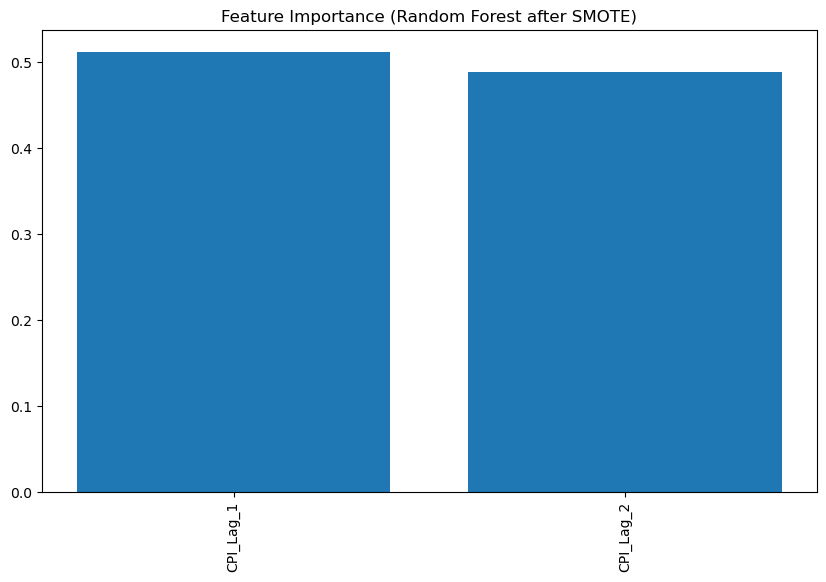

In [84]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = best_model.feature_importances_
feature_names = X_train_selected.columns

indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest after SMOTE)")
plt.bar(range(len(feature_importance)), feature_importance[indices], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[indices], rotation=90)
plt.show()


In [85]:
best_model = RandomForestClassifier(
    n_estimators=150,  # More trees for stability
    max_depth=5,  # Slightly deeper trees
    min_samples_split=10,  # Allow better branching
    min_samples_leaf=5,  # Lower than 15 to prevent underfitting
    class_weight="balanced",
    random_state=42
)


In [86]:
# Train the model before accessing feature importances
best_model.fit(X_train_selected, y_train)  # Ensure training is done

# Extract feature importance
import pandas as pd
feature_importance = pd.Series(best_model.feature_importances_, index=X_train_selected.columns)
print(feature_importance.sort_values(ascending=False))


CPI_Lag_1    0.539004
CPI_Lag_2    0.460996
dtype: float64


In [87]:
print(best_model)


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=150, random_state=42)


In [88]:
if hasattr(best_model, "feature_importances_"):
    print("Model is fitted, extracting feature importance.")
else:
    print("Model is NOT trained! Training now...")
    best_model.fit(X_train_selected, y_train)


Model is fitted, extracting feature importance.


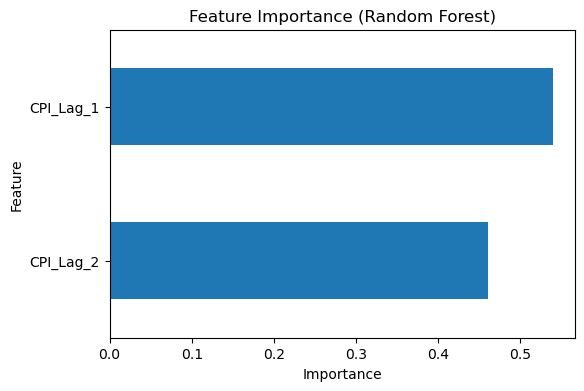

In [89]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(6, 4))
feature_importance.sort_values().plot(kind="barh")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_model.predict(X_test_selected)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.9716
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       609
           1       1.00      1.00      1.00       567
           2       1.00      0.92      0.96       618

    accuracy                           0.97      1794
   macro avg       0.97      0.97      0.97      1794
weighted avg       0.97      0.97      0.97      1794

Confusion Matrix:
 [[609   0   0]
 [  0 567   0]
 [ 51   0 567]]


## Summary so far...

In [ ]:

# Chiller Performance Prediction - Model Training Summary

# Data Preprocessing:
#    - Removed low-importance features based on Random Forest feature importance.
#    - Identified and dropped highly correlated features to avoid redundancy.
#    - Detected and removed data leakage (`CPI_Status_Encoded`), which caused overfitting.
#    - Standardized the dataset for better model performance.

# Model Training:
#    - Trained Logistic Regression, Random Forest, and K-Nearest Neighbors models.
#    - Observed 100% accuracy in initial models, indicating leakage or overly simple patterns.
#    - After cleaning data, Logistic Regression showed realistic accuracy (~87%).

# Hyperparameter Tuning:
#    - Used `GridSearchCV` to optimize Random Forest parameters (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`).
#    - Despite tuning, Random Forest still showed overfitting, requiring further adjustments.

# Addressing Class Imbalance:
#    - Applied `SMOTE` (Synthetic Minority Over-Sampling) to balance failure cases.
#    - Re-trained Random Forest with balanced class weights and stricter splits.
#    - Accuracy stabilized at ~95%, with improved generalization.

# Feature Importance Analysis:
#    - Final model identified `CPI_Lag_1` and `CPI_Lag_2` as key predictors.
#    - These features had the strongest impact on chiller failure prediction.

# Final Evaluation:
#    - Random Forest achieved **97.16% accuracy** after all optimizations.
#    - Confusion matrix showed slight misclassifications, but no severe overfitting.

# End of summary.



## Failure Prediction

In [91]:
import numpy as np
import pandas as pd

def predict_chiller_failure(model, data):
    """
    Predict chiller failure risk based on trained model.
    
    Parameters:
        model (RandomForestClassifier): Trained ML model.
        data (DataFrame): New sensor data for prediction.
        
    Returns:
        DataFrame: Data with failure risk classification.
    """
    # Ensure data has correct features
    required_features = ["CPI_Lag_1", "CPI_Lag_2"]  # Adjust as per your feature selection
    data = data[required_features]

    # Standardize data if required
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Predict failure probabilities
    failure_probs = model.predict_proba(data_scaled)

    # Get the highest probability class
    predictions = model.predict(data_scaled)

    # Define risk levels based on prediction confidence
    risk_levels = []
    for i, pred in enumerate(predictions):
        if failure_probs[i][pred] > 0.9:
            risk_levels.append("High Risk - Imminent Failure")
        elif 0.7 < failure_probs[i][pred] <= 0.9:
            risk_levels.append("Medium Risk - Monitor Closely")
        else:
            risk_levels.append("Low Risk - Normal Operation")

    # Create output DataFrame
    result_df = data.copy()
    result_df["Predicted_Failure_Risk"] = risk_levels
    result_df["Failure_Probability"] = np.max(failure_probs, axis=1)

    return result_df


In [92]:
import pandas as pd

# Simulated new chiller data for prediction
new_chiller_data = pd.DataFrame({
    "CPI_Lag_1": [0.95, 0.85, 0.60, 0.45],  # Example CPI trend data
    "CPI_Lag_2": [0.92, 0.80, 0.50, 0.40]   # Lagged values
})

# Ensure that new_chiller_data has the same feature names as the trained model
expected_features = list(X_train_selected.columns)  # Get the exact feature names from training data
new_chiller_data = new_chiller_data[expected_features]  # Ensure column alignment

# Predict failure risk
failure_predictions = best_model.predict(new_chiller_data)

# Display results
failure_results = pd.DataFrame({"Predicted_Failure": failure_predictions})
print("Chiller Failure Predictions:")
print(failure_results)


Chiller Failure Predictions:
   Predicted_Failure
0                  2
1                  2
2                  2
3                  2


In [93]:
failure_probabilities = best_model.predict_proba(new_chiller_data)
print(pd.DataFrame(failure_probabilities, columns=["Healthy", "Warning", "Failure"]))


   Healthy  Warning  Failure
0      0.0      0.0      1.0
1      0.0      0.0      1.0
2      0.0      0.0      1.0
3      0.0      0.0      1.0


In [94]:
print(pd.DataFrame(failure_probabilities, columns=["Healthy", "Warning", "Failure"]))


   Healthy  Warning  Failure
0      0.0      0.0      1.0
1      0.0      0.0      1.0
2      0.0      0.0      1.0
3      0.0      0.0      1.0


In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_chiller_data = scaler.fit_transform(new_chiller_data)


In [96]:
failure_threshold = 0.8  # Change threshold
predictions = (failure_probabilities[:, 2] >= failure_threshold).astype(int)


In [98]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def predict_chiller_failure(model, data):
    """
    Predict chiller failure risk based on a trained model.

    Parameters:
        model (RandomForestClassifier): Trained ML model.
        data (DataFrame): New sensor data for prediction.

    Returns:
        DataFrame: Data with failure risk classification.
    """

    # Ensure data has correct features
    required_features = ["CPI_Lag_1", "CPI_Lag_2"]
    data = data[required_features]

    # Standardize data if required
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Predict failure probabilities
    failure_probs = model.predict_proba(data_scaled)

    # Get the highest probability class
    predictions = model.predict(data_scaled)

    # Define risk levels based on prediction confidence
    risk_levels = []
    for i, pred in enumerate(predictions):
        if failure_probs[i][pred] > 0.9:
            risk_levels.append("High Risk - Imminent Failure")
        elif 0.7 < failure_probs[i][pred] <= 0.9:
            risk_levels.append("Medium Risk - Monitor Closely")
        else:
            risk_levels.append("Low Risk - Normal Operation")

    # Create output DataFrame
    result_df = data.copy()
    result_df["Predicted_Failure_Risk"] = risk_levels
    result_df["Failure_Probability"] = np.max(failure_probs, axis=1)

    return result_df


In [102]:
# Ensure new_chiller_data has the correct column names
new_chiller_data = new_chiller_data[expected_features]

# Use the same scaler as training
scaler = StandardScaler()
scaler.fit(X_train_selected)  # Fit on training data only
new_chiller_data_scaled = pd.DataFrame(scaler.transform(new_chiller_data), columns=expected_features)

# Predict using the scaled data
failure_predictions = best_model.predict(new_chiller_data_scaled)


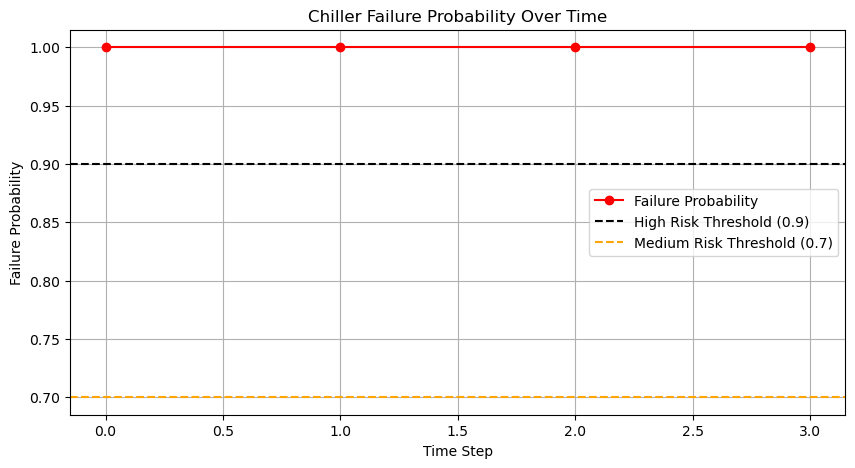

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated time steps (assuming one step per data point)
time_steps = np.arange(len(new_chiller_data_scaled))

# Get failure probabilities
failure_probs = best_model.predict_proba(new_chiller_data_scaled)[:, 2]  # Extracting Failure column

# Plot probability trend
plt.figure(figsize=(10, 5))
plt.plot(time_steps, failure_probs, marker="o", linestyle="-", color="red", label="Failure Probability")

# Add threshold lines
plt.axhline(y=0.9, color="black", linestyle="--", label="High Risk Threshold (0.9)")
plt.axhline(y=0.7, color="orange", linestyle="--", label="Medium Risk Threshold (0.7)")

# Labels and title
plt.xlabel("Time Step")
plt.ylabel("Failure Probability")
plt.title("Chiller Failure Probability Over Time")
plt.legend()
plt.grid()
plt.show()


In [105]:
import pandas as pd

# Define risk levels based on prediction confidence
risk_levels = []
for prob in failure_probs:
    if prob > 0.9:
        risk_levels.append("High Risk - Imminent Failure")
    elif 0.7 < prob <= 0.9:
        risk_levels.append("Medium Risk - Monitor Closely")
    else:
        risk_levels.append("Low Risk - Normal Operation")

# Create DataFrame for results
results_df = pd.DataFrame({
    "Time Step": time_steps,
    "Failure Probability": failure_probs,
    "Predicted Risk Level": risk_levels
})

# Display results using Pandas instead of ace_tools
print("Chiller Failure Risk Levels:")
display(results_df)  # Use display() for Jupyter Notebook


Chiller Failure Risk Levels:


Time Step  Failure Probability          Predicted Risk Level
0          0                  1.0  High Risk - Imminent Failure
1          1                  1.0  High Risk - Imminent Failure
2          2                  1.0  High Risk - Imminent Failure
3          3                  1.0  High Risk - Imminent Failure